# Milestone Correctness Evaluation

This notebook computes metrics about the correct completion of milestones by participants in both the Treatment and Control groups. 

The milestones that were evaluated for correctness are: 

1. Folder
2. File
3. Class
4. Method
5. Lines
6. High Level Solution (sound solution) 
7. Implementation


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results_milestones = './data/Milestones - timesStandard-prod-Final.csv'

df = pd.read_csv(results_milestones)

In [11]:
# correctnessMilestones = dataBinary_milestones[['right folder', 'right file', 'right class', 'right method', 'right lines', 'sound solution', 'group','issue_number']]
correctnessMilestones = df[['right folder', 'right file', 'right class', 'right method', 'right lines', 'correct', 'sound solution', 'group','issue_number']]
#  correctnessMilestones = correctnessMilestones.rename(columns={'right folder': "Rfolder", 'right file': "Rfile", 'right class': "Rclass", 'right method': "Rmethod", 'sound solution': "Rsolution", 'right lines': "Rlines"})
correctnessMilestones = correctnessMilestones.rename(columns={'right folder': "Rfolder", 'right file': "Rfile", 'right class': "Rclass", 'right method': "Rmethod", 'right lines': "Rlines", 'solution solution' : 'RSolution', 'correct' : "Rimplement"})

correctnessMilestones

,Rfolder,Rfile,Rclass,Rmethod,Rlines,Rimplement,sound solution,group,issue_number
0,y,y,y,n,n,n,n,Control,5679
1,y,y,y,y,y,y,y,Treatment,5485
2,n,n,n,n,n,n,n,Control,4612
3,n,n,n,n,n,n,y,Treatment,5194
4,n,n,n,n,n,n,n,Control,4612
5,n,n,n,n,n,n,y,Treatment,5069
6,n,n,n,n,n,n,n,Control,5485
7,n,n,n,n,n,n,y,Treatment,5485
8,y,y,y,y,y,y,y,Treatment,5485
9,n,n,n,n,n,n,y,Control,5069


In [12]:
correctnessMilestones = correctnessMilestones.replace("y", 1)
correctnessMilestones = correctnessMilestones.replace("n", 0)
correctnessMilestones

C:\Users\josep\AppData\Local\Temp\ipykernel_18372\2287217201.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  correctnessMilestones = correctnessMilestones.replace("n", 0)


,Rfolder,Rfile,Rclass,Rmethod,Rlines,Rimplement,sound solution,group,issue_number
0,1,1,1,0,0,0,0,Control,5679
1,1,1,1,1,1,1,1,Treatment,5485
2,0,0,0,0,0,0,0,Control,4612
3,0,0,0,0,0,0,1,Treatment,5194
4,0,0,0,0,0,0,0,Control,4612
5,0,0,0,0,0,0,1,Treatment,5069
6,0,0,0,0,0,0,0,Control,5485
7,0,0,0,0,0,0,1,Treatment,5485
8,1,1,1,1,1,1,1,Treatment,5485
9,0,0,0,0,0,0,1,Control,5069


In [13]:
milestonesAgg = correctnessMilestones.groupby('group').agg('sum')
milestonesAgg

,Rfolder,Rfile,Rclass,Rmethod,Rlines,Rimplement,sound solution,issue_number
group,,,,,,,,
Control,4,4,4,3,3,3,5,67951
Treatment,6,5,5,5,5,5,11,68505


In [14]:
# Define the relevant columns
correct_milestones_columns = ['right folder', 'right file', 'right class', 'right method', 'right lines', 'correct', 'sound solution']
time_columns = ['folder', 'file', 'class', 'method', 'line', 'solution']

# Ensure the YOE columns are numeric
df['Control YOE'] = pd.to_numeric(df['Control YOE'], errors='coerce')
df['Alt YOE'] = pd.to_numeric(df['Alt YOE'], errors='coerce')

# Map 'Control YOE' for Control group and 'Alt YOE' for Treatment group
df['Experience'] = df.apply(lambda row: row['Control YOE'] if row['group'] == 'Control' else row['Alt YOE'], axis=1)

# Mask correct milestones and use experience values
correct_experience_by_group = pd.DataFrame()
for correct_col in correct_milestones_columns:
    correct_experience_by_group[correct_col] = df['Experience'].where(df[correct_col] == 'y')
#print(correct_experience_by_group)



In [15]:
milestone_columns = ['issue', 'problem', 'folder', 'file', 'class', 'method', 'line', 'solution', 'implement']

# Calculate the number of participants that completed each milestone
milestone_counts = df[milestone_columns].notna().sum()



In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your dataframe and 'milestone_columns' contains the list of milestones

# Define groups
groups = ['Control', 'Treatment']

# Calculate the percentage of participants who completed each milestone
completion_percentage = df.groupby('group')[milestone_columns].apply(lambda x: x.notna().mean() * 100)
print ('completion_percentage',completion_percentage)
# Calculate the average time to complete each milestone
average_completion_time = df.groupby('group')[milestone_columns].mean()
average_completion_time.head()

completion_percentage            issue  problem      folder        file       class     method  \
group                                                                      
Control    100.0    100.0   84.615385   84.615385   84.615385  76.923077   
Treatment  100.0    100.0  100.000000  100.000000  100.000000  84.615385   

                line    solution  implement  
group                                        
Control    69.230769   69.230769  53.846154  
Treatment  76.923077  100.000000  69.230769  


,issue,problem,folder,file,class,method,line,solution,implement
group,,,,,,,,,
Control,9.076923,19.769231,32.181818,32.272727,34.090909,33.300000,34.777778,42.444444,49.285714
Treatment,5.692308,19.538462,33.692308,36.769231,36.846154,36.545455,35.900000,41.692308,41.222222


In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Define the correctness columns
correctness_columns = ['correct folder', 'correct file', 'correct class', 'correct method', 'correct lines', 'correct solution', 'correct implementation']
time_columns = ['folder', 'file', 'class', 'method', 'line', 'solution', 'implement']

df.rename(columns={'right folder' : 'correct folder', 'right file' : 'correct file', 'right class' : 'correct class',
                   'right method' : 'correct method', 'right lines' : 'correct lines', 'right solution' : 'correct solution',
                   'correct': 'correct implementation', 'sound solution': 'correct solution'}, inplace=True)

df.head()

,PX,start,group,issue,problem,folder,file,class,method,line,...,Gift card requested,Gift card received,group.1,issue_number,Control YOE,Control Contribs,Alt YOE,Alt Contrib,soundness,Experience
0,P0,2:35 PM,Control,17,17,18.0,18.0,19.0,21.0,21.0,...,y,y,Control,5679,4.0,0.0,NaN,NaN,n,4.0
1,P1,10:15 AM,Treatment,2,3,44.0,45.0,45.0,46.0,47.0,...,y,y,Treatment,5485,NaN,NaN,7.0,0.0,y,7.0
2,P2,3:09:00 PM,Control,1,6,56.0,56.0,58.0,NaN,NaN,...,y,y,Treatment,4612,3.0,0.0,NaN,NaN,y,3.0
3,P3,4:21:00 PM,Treatment,3,19,23.0,23.0,23.0,27.0,27.0,...,y,y,Treatment,5194,NaN,NaN,9.0,9.0,n,9.0
4,P4,1:20 PM,Control,4,14,38.0,38.0,38.0,41.0,41.0,...,y,y,Control,4612,1.0,1.0,NaN,NaN,n,1.0


correctness_percentage            correct folder  correct file  correct class  correct method  \
group                                                                    
Control         30.769231     30.769231      30.769231       23.076923   
Treatment       46.153846     38.461538      38.461538       38.461538   

           correct lines  correct solution  correct implementation  
group                                                               
Control        23.076923         38.461538               23.076923  
Treatment      38.461538         84.615385               38.461538  
correct_time_taken               folder       file      class     method       line   solution  \
group                                                                         
Control    32.181818  32.272727  34.090909  33.300000  34.777778  42.444444   
Treatment  33.692308  36.769231  36.846154  36.545455  35.900000  41.692308   

           implement  
group                 
Control    49.285714  

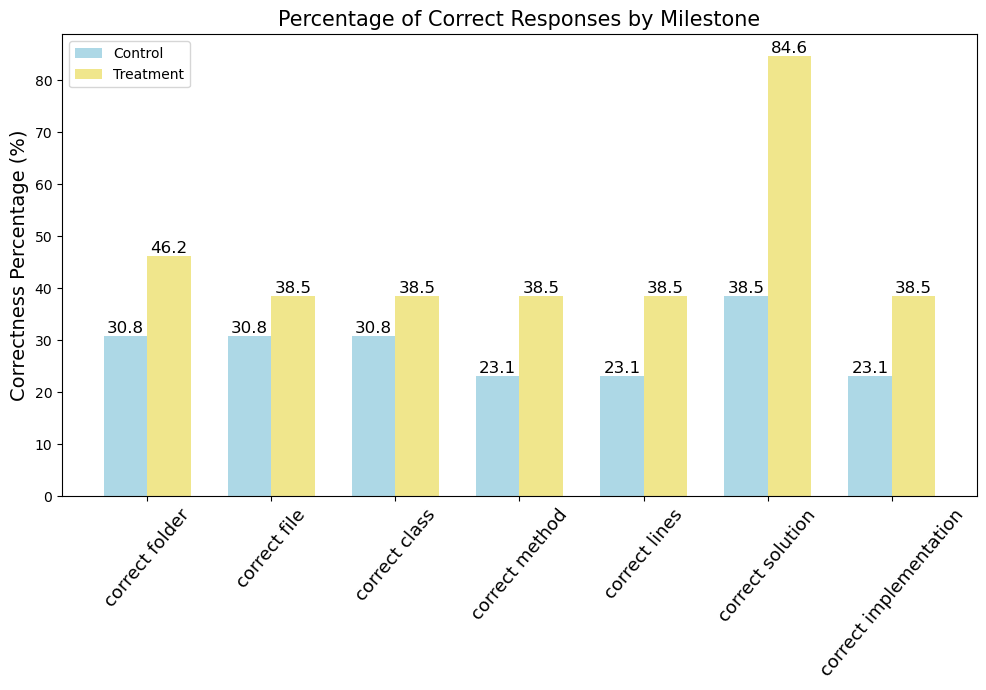

In [18]:
# Calculate the average correctness percentage for each group
correctness_percentage = df.groupby('group')[correctness_columns].apply(lambda x: (x == 'y').mean() * 100)

print('correctness_percentage', correctness_percentage)
# Calculate the average time taken for correct completions
correct_time_taken = df.groupby('group')[time_columns].mean()
print('correct_time_taken', correct_time_taken)
# Plot template
milestones = correctness_columns
x = np.arange(len(milestones))  # Label locations
print('x',x)
width = 0.35  # Bar width

fig, ax1 = plt.subplots(figsize=(10, 7))

# Plot the completion percentages as stacked bars
bars1 = ax1.bar(x - width/2, correctness_percentage.loc['Control'].round(1), width, label='Control', color='lightblue')
bars2 = ax1.bar(x + width/2, correctness_percentage.loc['Treatment'].round(1), width, label='Treatment', color='khaki')#, hatch='/')

# Title, labels, and ticks
ax1.set_ylabel('Correctness Percentage (%)', fontsize=14)
ax1.set_title('Percentage of Correct Responses by Milestone', fontsize=15)
x_tick = 0
# for i in correct_time_taken.loc['Control']:
#     print(i)
#     ax2.annotate(round(i, 1), xy=(x_tick - .1, i-3), xytext=(0,0), textcoords='offset points')
#     x_tick += 1



ax1.set_xticks(x)
ax1.set_xticklabels(milestones, rotation=50, fontsize=13)
ax1.bar_label(bars1, label_type='edge', fontsize=12)
ax1.bar_label(bars2, label_type='edge', fontsize=12)



# Legends
ax1.legend(loc='upper left')
plt.tight_layout()

# Save the plot as PNG and PDF
plt.savefig('./figures/correctness_percentage_by_group.png', format='png')
plt.savefig('./figures/correctness_percentage_by_group.pdf', format='pdf')

# Show the plot
plt.show()